In [2]:
!pip install plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 653.6 kB/s eta 0:00:24
    --------------------------------------- 0.2/15.6 MB 1.4 MB/s eta 0:00:12
   - -------------------------------------- 0.4/15.6 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.6/15.6 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/15.6 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/15.6 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/15.6 MB 2.9 MB/s eta 0:00:05
   --- ------------------------------------ 1.4/15.6 MB 3.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/15.6 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/15.6 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.9/15.6 MB 3.5 MB/s eta 0:00:04
   ---- ---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

In [12]:
#download and import the csv file
import os

download_dir = "./data/"

download_url = "https://github.com/viveknaidu007/datasets-for-ml-projects/blob/main/cardekho_dataset.csv"

os.makedirs(download_dir, exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

print(filename)

print(download_file_path)

cardekho_dataset.csv
./data/cardekho_dataset.csv


In [13]:
urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 13


In [18]:
df = pd.read_csv(r"carprice\cardekho_dataset.csv", index_col=[0])

In [19]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [16]:
df.shape

(15411, 14)

In [17]:
#sumaary of dataset

df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
#check datatypes in the dataset

#check null and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [21]:
#exploring data

In [23]:
df['seller_type'].dtype!='0'

True

In [26]:
#exploring data

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("\n we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

 we have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
#feature information:



In [27]:
#porportion of count data on categorial columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('--------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
--------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini

In [ ]:
#univariate analysis
#it refers to term univariate analysis refers to the analysis of one variable prefix "uni" menas "one" 
#the purpose of univariate analysis is to understand the distribution of values for a single variable

In [ ]:
#numerical features

C:\Users\poppo\AppData\Local\Temp\ipykernel_44676\814766053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
C:\Users\poppo\AppData\Local\Temp\ipykernel_44676\814766053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
C:\Users\poppo\AppData\Local\Temp\ipykernel_44676\814766053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
C:\Users\poppo\AppData\Local\Temp\ipykernel_44676\814766053.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

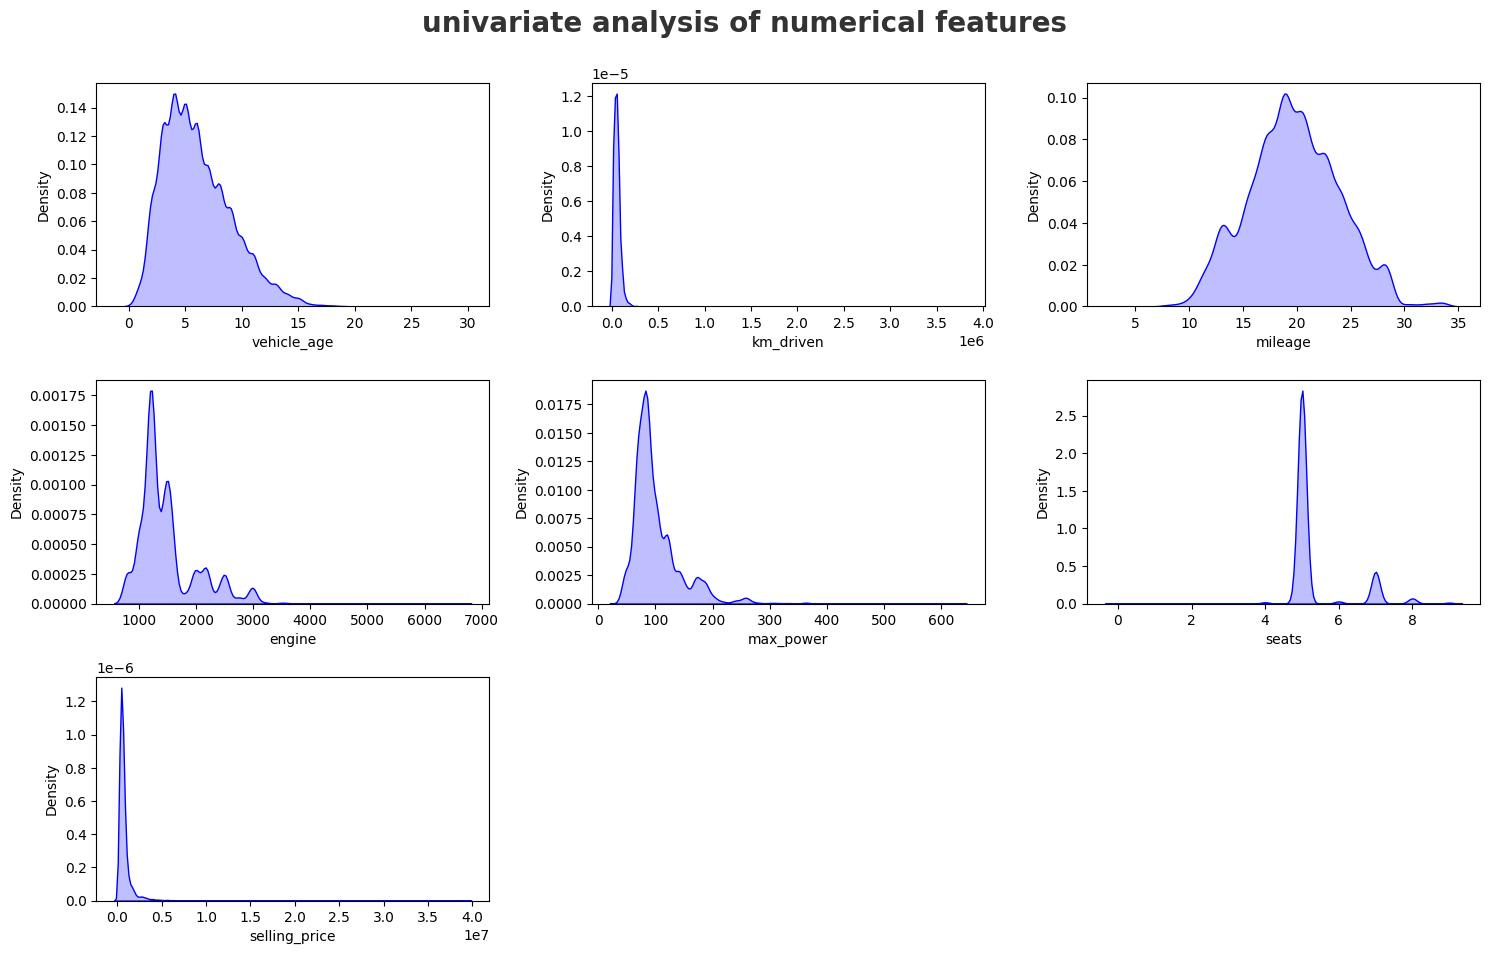

In [29]:
plt.figure(figsize=(15,15))
plt.suptitle('univariate analysis of numerical features', fontsize=20,fontweight='bold',alpha=0.8,y=1 )

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)   #5rows and 3 columns and i+1 index plot
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')  #kerneld
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='max_power'>

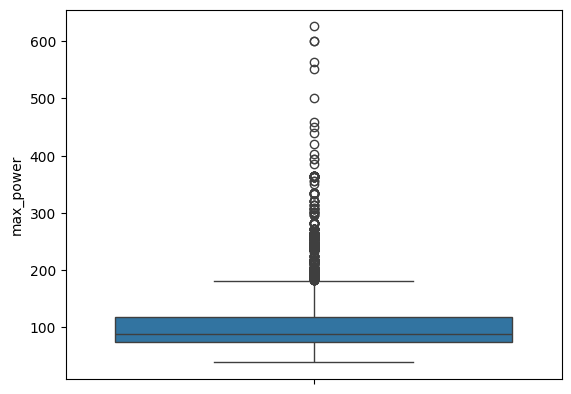

In [30]:
sns.boxplot(df['max_power'])  #we can no of outlier 

<Axes: ylabel='km_driven'>

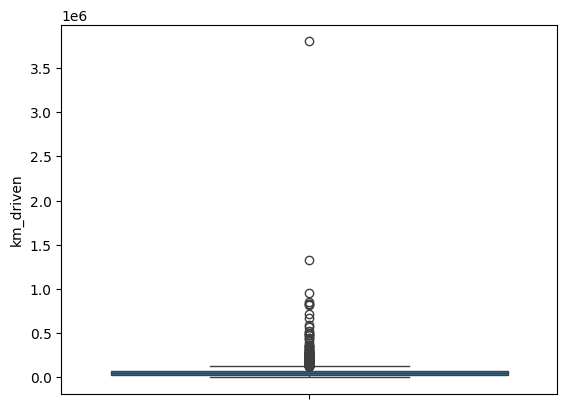

In [31]:
sns.boxplot(df['km_driven'])

report:




In [ ]:
#categorical features

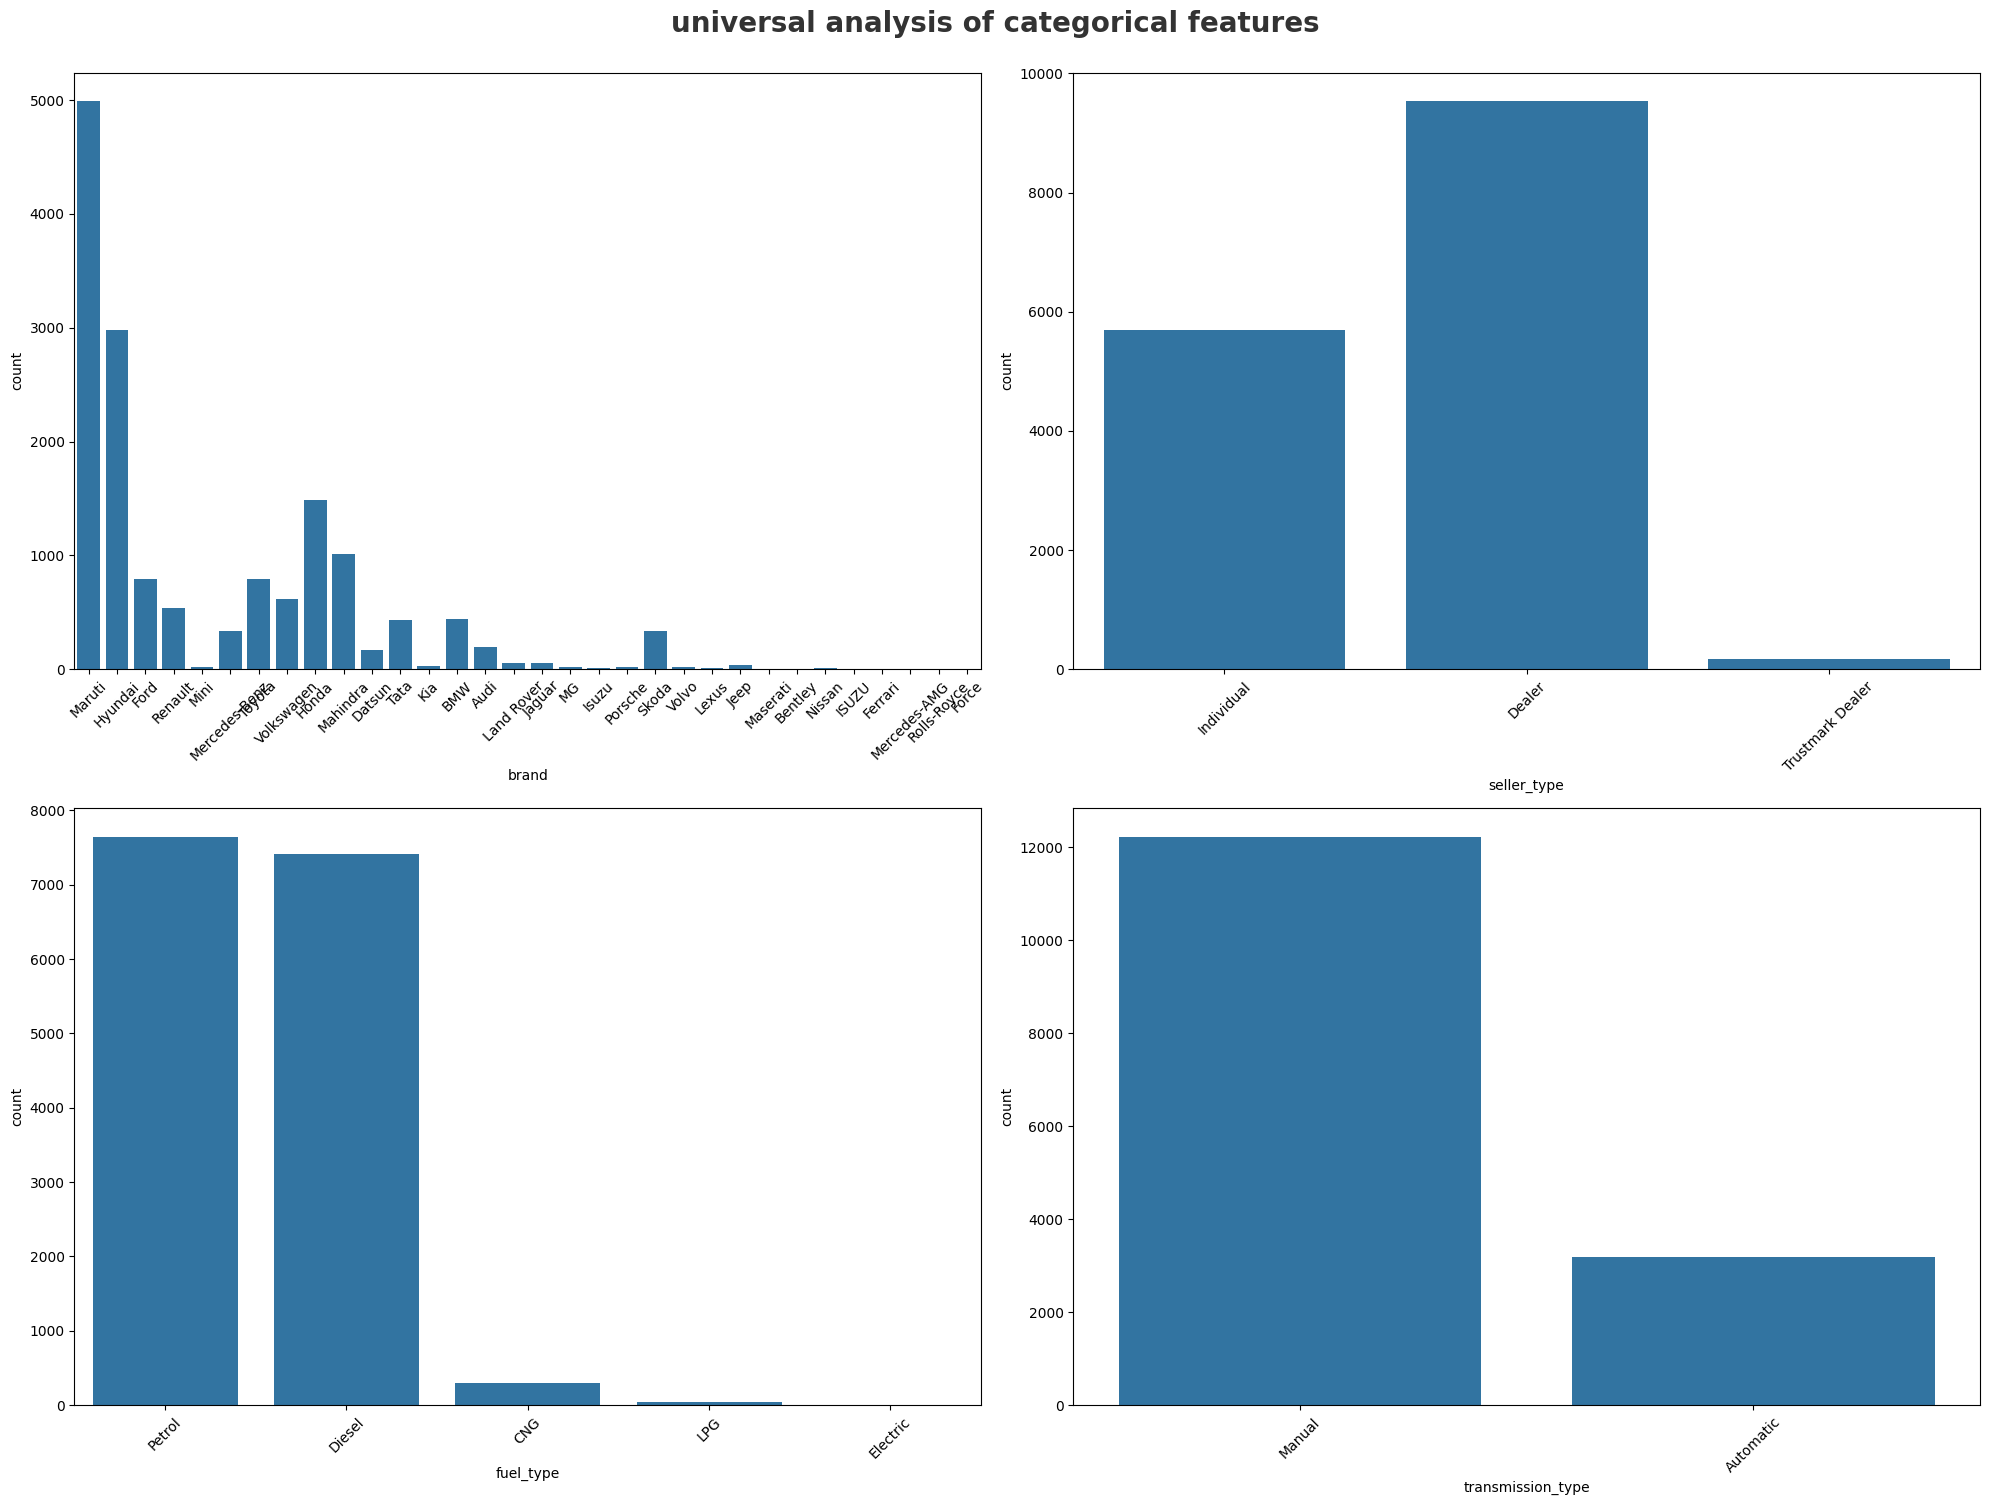

In [32]:
#categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('universal analysis of categorical features', fontsize=20, fontweight='bold',alpha=0.8,y=1  )
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [ ]:
#multivariate analysis
#- it is the analysis of more than one variable

In [33]:
#check multicollinearity in numerical fetures

In [35]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [34]:
df[(list(df.columns)[1:])].corr()

ValueError: could not convert string to float: 'Maruti'

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

ValueError: could not convert string to float: 'Maruti Alto'

<Figure size 1500x1000 with 0 Axes>

In [38]:
#checking null values 
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64